In [1]:
import sys
import os
import pickle

library_path = os.path.join('..', '..', '..','UCB-USACE-LSTMs')
sys.path.insert(0, library_path)

from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation.metrics import *
from neuralhydrology.nh_run import start_run, eval_run, finetune
from neuralhydrology.utils.nh_results_ensemble import create_results_ensemble
from neuralhydrology.UCB_training.UCB_train import UCB_trainer
from neuralhydrology.evaluation.metrics import calculate_all_metrics

Quick check that working directory and train basin file exists:

In [2]:
print("Current Working Directory:", os.getcwd())
print("Train Basin File Exists:", os.path.exists("warm springs"))

Current Working Directory: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all
Train Basin File Exists: True


check that daily no phyiscs still runs correctly:

In [3]:
path_to_csv = Path("/Users/mia/research/updated_russian_river_data_folder/")
path_to_yaml = Path("warm_springs_dam.yaml")
params = {
    "epochs":5,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 365,
}
#defaults to daily so no need to specify hourly
lstmNoPhysicsDaily = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params)

In [4]:
lstmNoPhysicsDaily.train()

2025-01-04 20:11:19,221: Logging to /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_0401_201119/output.log initialized.
2025-01-04 20:11:19,229: ### Folder structure created at /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_0401_201119
2025-01-04 20:11:19,231: ### Run configurations for testing_run
2025-01-04 20:11:19,236: experiment_name: testing_run
2025-01-04 20:11:19,239: train_basin_file: warm springs
2025-01-04 20:11:19,243: validation_basin_file: warm springs
2025-01-04 20:11:19,270: test_basin_file: warm springs
2025-01-04 20:11:19,273: train_start_date: 1994-10-01 00:00:00
2025-01-04 20:11:19,277: train_end_date: 2002-09-30 00:00:00
2025-01-04 20:11:19,279: validation_start_date: 2002-10-01 00:00:00
2025-01-04 20:11:19,292: validation_end_date: 2005-09-30 00:00:00
2025-01-04 20:11:19,305: test_start_date: 2005-10-01 00:00:00
2025-01-04 20:11:19,309: test_end_date: 2009-09-30 00:00:00
2025-01-04 20:11:

Using basin: Warm Springs
Using target variable: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH


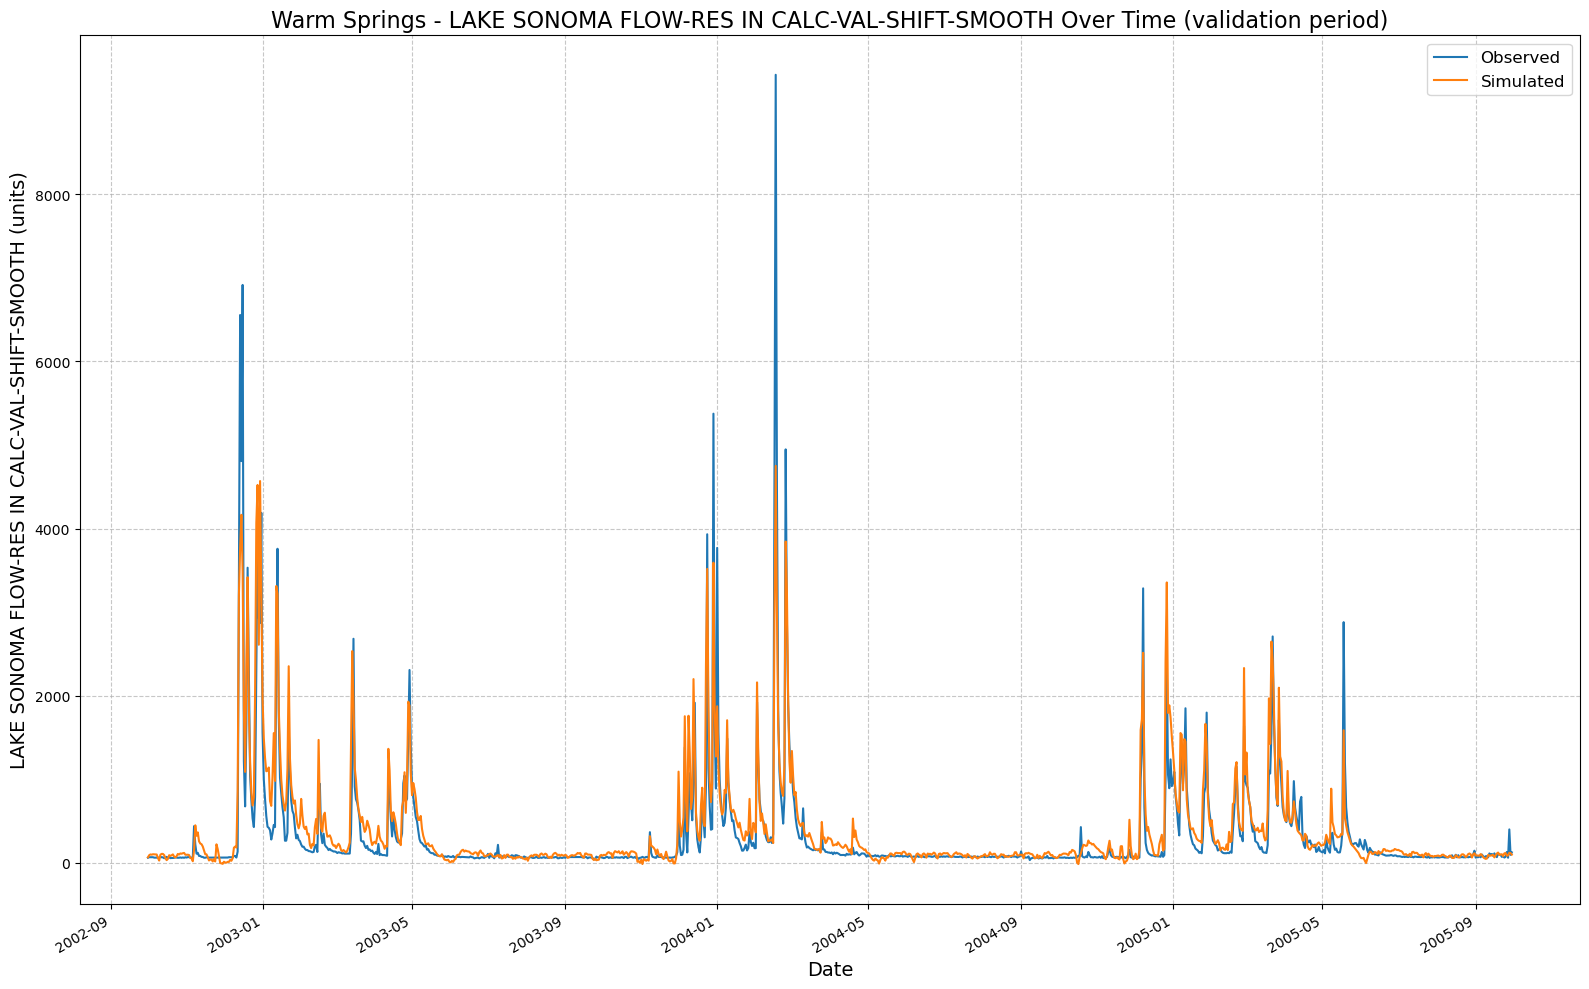

[INFO] CSV output saved at: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_0401_201119/results_output_validation.csv


{'NSE': 0.7957713901996613,
 'MSE': 100131.9765625,
 'RMSE': 316.43637047991183,
 'KGE': 0.7561966157305287,
 'Alpha-NSE': 0.8848268014035626,
 'Beta-KGE': 1.1882716417312622,
 'Beta-NSE': 0.08752910832109001,
 'Pearson-r': 0.8964190489224572,
 'FHV': -17.74296909570694,
 'FMS': 2.5794788489078964,
 'FLV': -2696.0611430420167,
 'Peak-Timing': 0.4,
 'Peak-MAPE': 37.227535247802734}

In [5]:
lstmNoPhysicsDaily.results()

check if no physics hourly works:

In [8]:
path_to_csv = Path("/Users/mia/research/updated_russian_river_data_folder/")
path_to_yaml = Path("warm_springs_dam.yaml")
params = {
    "epochs":5,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 365,
}
#if using hourly data , set hourly = True
lstmNoPhysicsHourly = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, hourly=True)

In [9]:
lstmNoPhysicsHourly.train()

2024-12-31 13:56:18,977: Logging to /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_3112_135618/output.log initialized.
2024-12-31 13:56:18,978: ### Folder structure created at /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_3112_135618
2024-12-31 13:56:18,980: ### Run configurations for testing_run
2024-12-31 13:56:18,984: experiment_name: testing_run
2024-12-31 13:56:18,987: train_basin_file: warm springs
2024-12-31 13:56:18,989: validation_basin_file: warm springs
2024-12-31 13:56:18,991: test_basin_file: warm springs
2024-12-31 13:56:18,992: train_start_date: 1994-10-01 00:00:00
2024-12-31 13:56:18,994: train_end_date: 2002-09-30 00:00:00
2024-12-31 13:56:18,996: validation_start_date: 2002-10-01 00:00:00
2024-12-31 13:56:18,998: validation_end_date: 2005-09-30 00:00:00
2024-12-31 13:56:18,999: test_start_date: 2005-10-01 00:00:00
2024-12-31 13:56:19,003: test_end_date: 2009-09-30 00:00:00
2024-12-31 13:56:

KeyboardInterrupt: 

Using basin: Warm Springs
Using target variable: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH


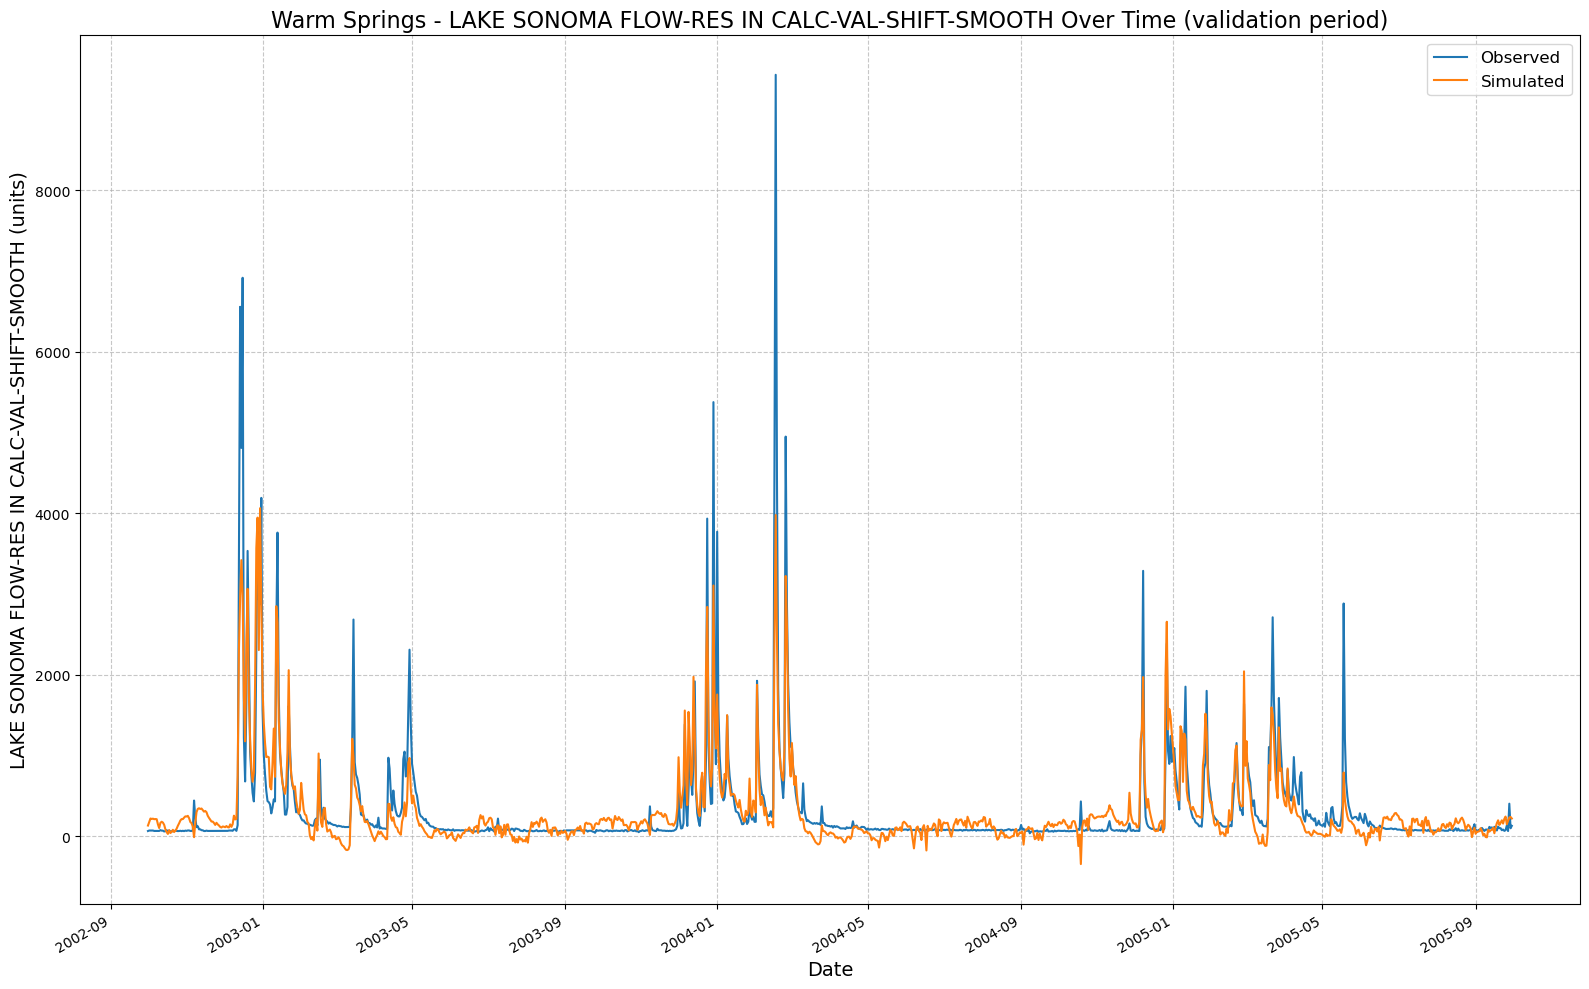

[INFO] CSV output saved at: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_3112_133032/results_output_validation.csv


{'NSE': 0.7376830577850342,
 'MSE': 128612.3203125,
 'RMSE': 358.62559907583284,
 'KGE': 0.6955029358495141,
 'Alpha-NSE': 0.736710850152564,
 'Beta-KGE': 0.9194474220275879,
 'Beta-NSE': -0.037449590249851054,
 'Pearson-r': 0.869967050979846,
 'FHV': -30.858105421066284,
 'FMS': -1.0984204321273996,
 'FLV': -1604.737892796429,
 'Peak-Timing': 0.2,
 'Peak-MAPE': 57.11764335632324}

In [14]:
lstmNoPhysicsHourly.results()

check if physics daily still works:

In [6]:
path_to_csv = Path("/Users/mia/research/updated_russian_river_data_folder/")
path_to_yaml = Path("warm_springs_dam.yaml")
path_to_physics_data = Path("/Users/mia/research/updated_russian_river_data_folder/HMS_outputs_for_UCB/WarmSprings_Inflow_daily.csv")
params = {
    "epochs":5,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 365,
}
features_with_physics = [
    #from daily.csv
    "DRY CREEK 20 PRECIP-INC SCREENED",
    "DRY CREEK 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "DRY CREEK 30 PRECIP-INC SCREENED",
    "DRY CREEK 30 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "SANTA ROSA CA HUMIDITY USAF-NOAA",
    "SANTA ROSA CA SOLAR RADIATION USAF-NOAA",
    "SANTA ROSA CA TEMPERATURE USAF-NOAA",
    "SANTA ROSA CA WINDSPEED USAF-NOAA",
    #from Warm_Spring_Inflow.csv
    'Dry Creek 20 ET-POTENTIAL', 
    'Dry Creek 20 FLOW',
    'Dry Creek 20 FLOW-BASE', 
    'Dry Creek 20 INFILTRATION',
    'Dry Creek 20 PERC-SOIL',
    'Dry Creek 20 SATURATION FRACTION',
    'Dry Creek 30 ET-POTENTIAL', 
    'Dry Creek 30 FLOW',
    'Dry Creek 30 FLOW-BASE', 
    'Dry Creek 30 INFILTRATION',
    'Dry Creek 30 PERC-SOIL',
    'Dry Creek 30 SATURATION FRACTION',
    'Warm Springs Dam Inflow FLOW',
    ]
lstmPhysicsDaily = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data, hourly=False)

In [7]:
lstmPhysicsDaily.train()

2025-01-04 20:15:08,413: Logging to /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_0401_201508/output.log initialized.
2025-01-04 20:15:08,429: ### Folder structure created at /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_0401_201508
2025-01-04 20:15:08,431: ### Run configurations for testing_run
2025-01-04 20:15:08,433: experiment_name: testing_run
2025-01-04 20:15:08,435: train_basin_file: warm springs
2025-01-04 20:15:08,437: validation_basin_file: warm springs
2025-01-04 20:15:08,438: test_basin_file: warm springs
2025-01-04 20:15:08,440: train_start_date: 1994-10-01 00:00:00
2025-01-04 20:15:08,443: train_end_date: 2002-09-30 00:00:00
2025-01-04 20:15:08,444: validation_start_date: 2002-10-01 00:00:00
2025-01-04 20:15:08,447: validation_end_date: 2005-09-30 00:00:00
2025-01-04 20:15:08,449: test_start_date: 2005-10-01 00:00:00
2025-01-04 20:15:08,451: test_end_date: 2009-09-30 00:00:00
2025-01-04 20:15:

2025-01-04 20:15:08,549: ### Device cpu will be used for training
2025-01-04 20:15:08,552: Loading basin data into xarray data set.
100%|██████████| 1/1 [00:00<00:00,  1.02it/s]
2025-01-04 20:15:09,600: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 114.47it/s]
2025-01-04 20:15:09,649: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 10/10 [00:17<00:00,  1.75s/it, Loss: 0.0000]
2025-01-04 20:15:27,656: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 10/10 [00:12<00:00,  1.30s/it, Loss: 0.0000]
2025-01-04 20:15:40,660: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 10/10 [00:12<00:00,  1.21s/it, Loss: 0.0000]
2025-01-04 20:15:52,871: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 10/10 [00:11<00:00,  1.18s/it, Loss: 0.0000]
2025-01-04 20:16:04,694: Epoch 4 average loss: avg_loss: 0.00000, avg_

Using basin: Warm Springs
Using target variable: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH


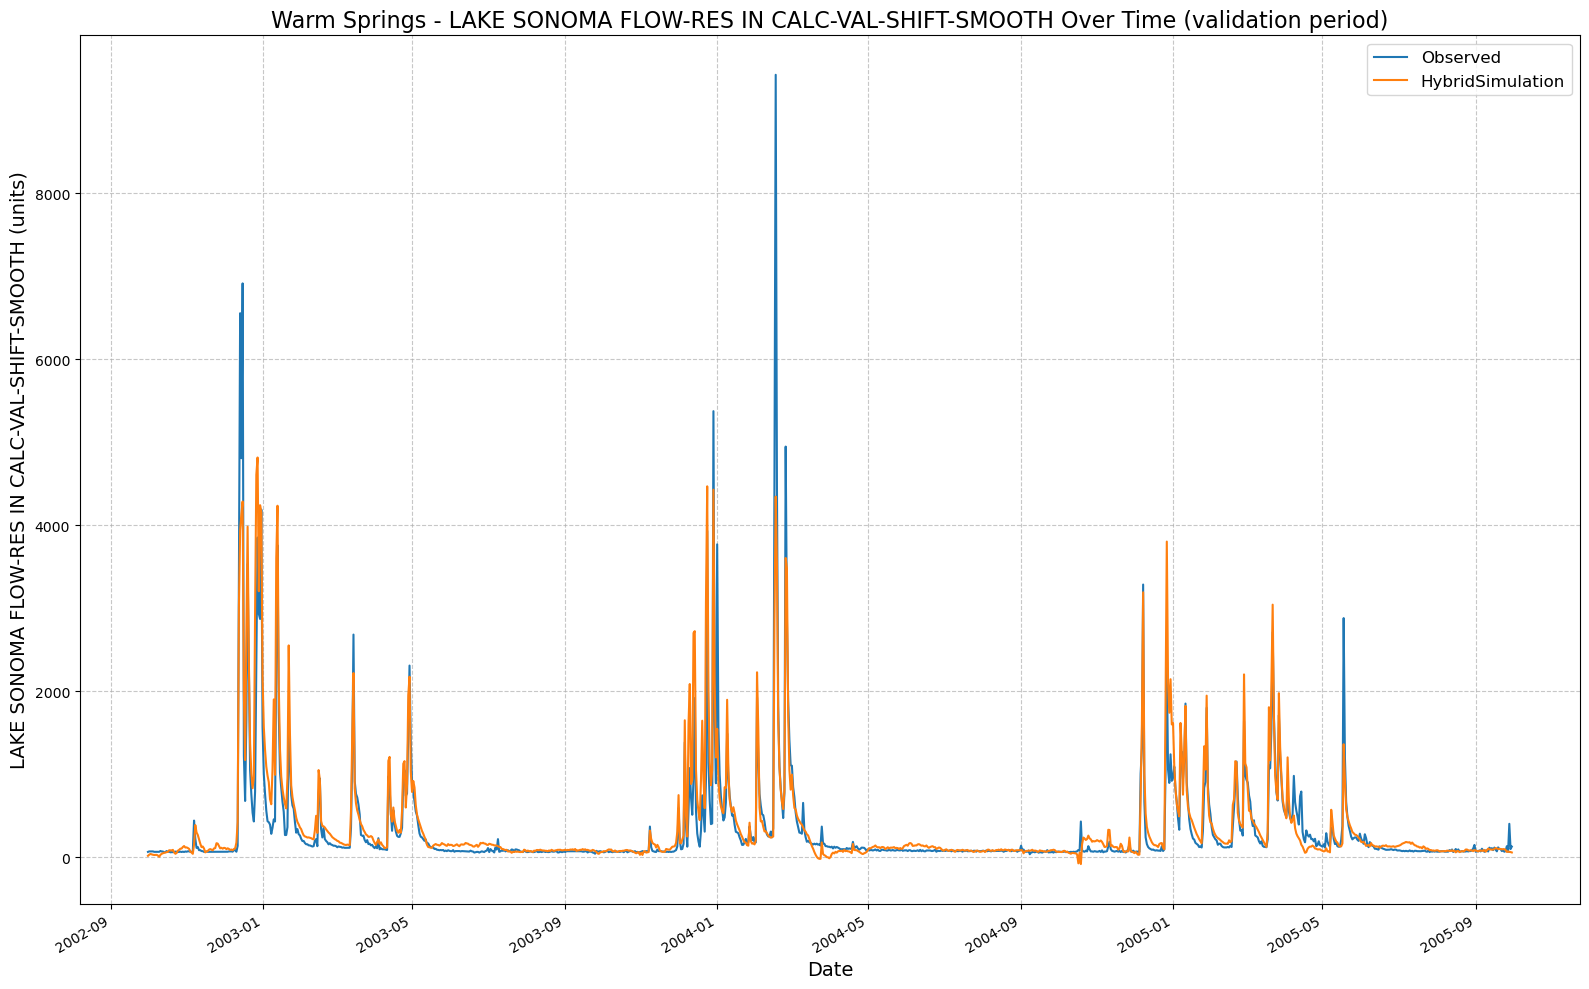

[INFO] CSV output saved at: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_3112_135752/results_output_validation.csv


{'NSE': 0.794105052947998,
 'MSE': 100948.9765625,
 'RMSE': 317.72468673759045,
 'KGE': 0.8192749666971805,
 'Alpha-NSE': 0.9528337765047525,
 'Beta-KGE': 1.1395772695541382,
 'Beta-NSE': 0.06489066864477584,
 'Pearson-r': 0.8953335256764945,
 'FHV': -9.128661453723907,
 'FMS': 1.3052979573617323,
 'FLV': -2718.131889267451,
 'Peak-Timing': 0.0,
 'Peak-MAPE': 30.671987533569332}

In [12]:
lstmPhysicsDaily.results()

test if hourly physics informed works:

In [2]:
path_to_csv = Path("/Users/mia/research/updated_russian_river_data_folder/")
path_to_yaml = Path("warm_springs_dam.yaml")
path_to_physics_data = Path("/Users/mia/research/updated_russian_river_data_folder/HMS_outputs_for_UCB/WarmSprings_Inflow_hourly.csv")
params = {
    "epochs":5,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 365,
}
features_with_physics = [
    #from daily.csv
    "DRY CREEK 20 PRECIP-INC SCREENED",
    "DRY CREEK 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "DRY CREEK 30 PRECIP-INC SCREENED",
    "DRY CREEK 30 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "SANTA ROSA CA HUMIDITY USAF-NOAA",
    "SANTA ROSA CA SOLAR RADIATION USAF-NOAA",
    "SANTA ROSA CA TEMPERATURE USAF-NOAA",
    "SANTA ROSA CA WINDSPEED USAF-NOAA",
    #from Warm_Spring_Inflow.csv
    'Dry Creek 20 ET-POTENTIAL', 
    'Dry Creek 20 FLOW',
    'Dry Creek 20 FLOW-BASE', 
    'Dry Creek 20 INFILTRATION',
    'Dry Creek 20 PERC-SOIL',
    'Dry Creek 20 SATURATION FRACTION',
    'Dry Creek 30 ET-POTENTIAL', 
    'Dry Creek 30 FLOW',
    'Dry Creek 30 FLOW-BASE', 
    'Dry Creek 30 INFILTRATION',
    'Dry Creek 30 PERC-SOIL',
    'Dry Creek 30 SATURATION FRACTION',
    'Warm Springs Dam Inflow FLOW',
    ]
lstmPhysicsHourly = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data, hourly=True)

In [3]:
lstmPhysicsHourly.train()

2024-12-31 13:52:55,856: Logging to /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_3112_135255/output.log initialized.
2024-12-31 13:52:55,857: ### Folder structure created at /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_3112_135255
2024-12-31 13:52:55,865: ### Run configurations for testing_run
2024-12-31 13:52:55,872: experiment_name: testing_run
2024-12-31 13:52:55,881: train_basin_file: warm springs
2024-12-31 13:52:55,906: validation_basin_file: warm springs
2024-12-31 13:52:55,911: test_basin_file: warm springs
2024-12-31 13:52:55,914: train_start_date: 1994-10-01 00:00:00
2024-12-31 13:52:55,917: train_end_date: 2002-09-30 00:00:00
2024-12-31 13:52:55,920: validation_start_date: 2002-10-01 00:00:00
2024-12-31 13:52:55,922: validation_end_date: 2005-09-30 00:00:00
2024-12-31 13:52:55,927: test_start_date: 2005-10-01 00:00:00
2024-12-31 13:52:55,936: test_end_date: 2009-09-30 00:00:00
2024-12-31 13:52:

ValueError: could not convert string to float: ''

In [ ]:
lstmPhysicsHourly.results()

TEST OF THE EXTENDED TRAINING PERIOD

In [6]:
path_to_csv = Path("/Users/mia/research/updated_russian_river_data_folder/")
path_to_yaml = Path("warm_springs_dam.yaml")
path_to_physics_data = Path("/Users/mia/research/updated_russian_river_data_folder/HMS_outputs_for_UCB/WarmSprings_Inflow_daily.csv")
params = {
    "epochs":5,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 365,
}
features_with_physics = [
    #from daily.csv
    "DRY CREEK 20 PRECIP-INC SCREENED",
    "DRY CREEK 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "DRY CREEK 30 PRECIP-INC SCREENED",
    "DRY CREEK 30 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "SANTA ROSA CA HUMIDITY USAF-NOAA",
    "SANTA ROSA CA SOLAR RADIATION USAF-NOAA",
    "SANTA ROSA CA TEMPERATURE USAF-NOAA",
    "SANTA ROSA CA WINDSPEED USAF-NOAA",
    #from Warm_Spring_Inflow.csv
    'Dry Creek 20 ET-POTENTIAL', 
    'Dry Creek 20 FLOW',
    'Dry Creek 20 FLOW-BASE', 
    'Dry Creek 20 INFILTRATION',
    'Dry Creek 20 PERC-SOIL',
    'Dry Creek 20 SATURATION FRACTION',
    'Dry Creek 30 ET-POTENTIAL', 
    'Dry Creek 30 FLOW',
    'Dry Creek 30 FLOW-BASE', 
    'Dry Creek 30 INFILTRATION',
    'Dry Creek 30 PERC-SOIL',
    'Dry Creek 30 SATURATION FRACTION',
    'Warm Springs Dam Inflow FLOW',
    ]
#extend train period set to true
lstmPhysicsDailyExtended = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data, hourly=False, extend_train_period=True)

In [8]:
lstmPhysicsDailyExtended.train()

2025-01-04 20:45:02,431: Logging to /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_0401_204502/output.log initialized.
2025-01-04 20:45:02,437: ### Folder structure created at /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_0401_204502
2025-01-04 20:45:02,447: ### Run configurations for testing_run
2025-01-04 20:45:02,449: experiment_name: testing_run
2025-01-04 20:45:02,460: train_basin_file: warm springs
2025-01-04 20:45:02,474: validation_basin_file: warm springs
2025-01-04 20:45:02,475: test_basin_file: warm springs
2025-01-04 20:45:02,487: train_start_date: 1994-10-01 00:00:00
2025-01-04 20:45:02,497: train_end_date: 2005-09-30 00:00:00
2025-01-04 20:45:02,501: validation_start_date: 2002-10-01 00:00:00
2025-01-04 20:45:02,507: validation_end_date: 2005-09-30 00:00:00
2025-01-04 20:45:02,513: test_start_date: 2005-10-01 00:00:00
2025-01-04 20:45:02,516: test_end_date: 2009-09-30 00:00:00
2025-01-04 20:45:

2025-01-04 20:48:40,562: Using the model weights from /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_0401_204502/model_epoch005.pt
# Evaluation: 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]
2025-01-04 20:48:43,836: Stored metrics at /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_0401_204502/test/model_epoch005/test_metrics.csv
2025-01-04 20:48:43,838: Stored results at /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_0401_204502/test/model_epoch005/test_results.p
Using basin: Warm Springs
Using target variable: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH


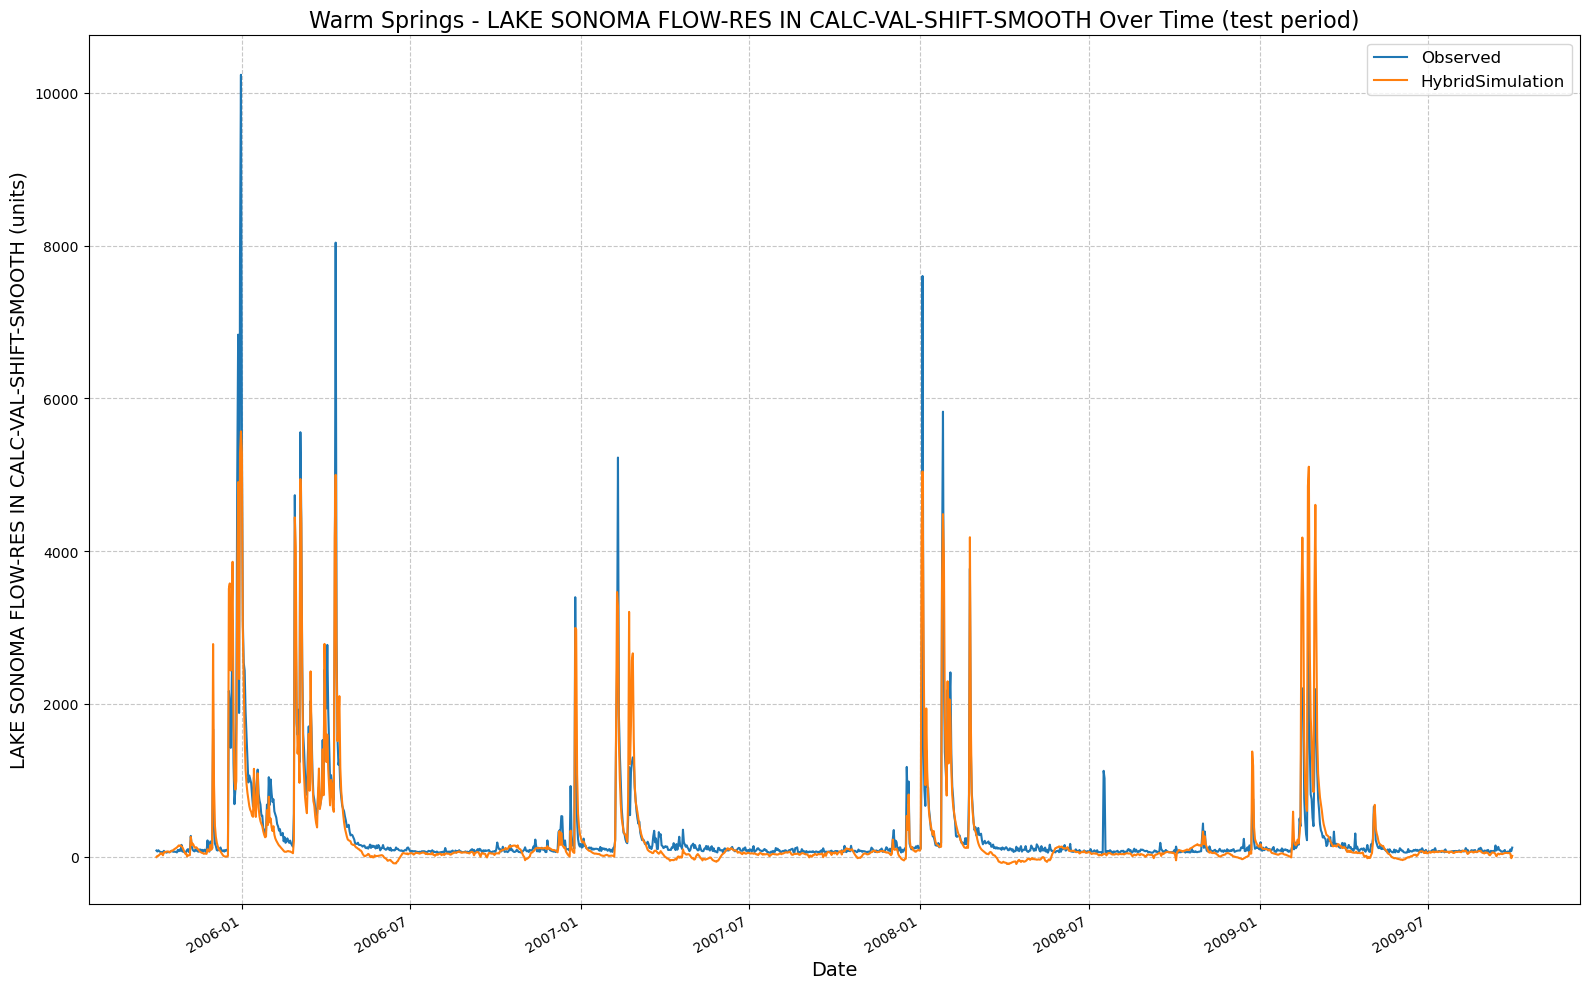

[INFO] CSV output saved at: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_0401_204502/results_output_test.csv


{'NSE': 0.8043259084224701,
 'MSE': 104715.875,
 'RMSE': 323.59832354324703,
 'KGE': 0.8469433304318628,
 'Alpha-NSE': 0.9743835915084428,
 'Beta-KGE': 0.8860927820205688,
 'Beta-NSE': -0.046324509938969256,
 'Pearson-r': 0.9010288455787748,
 'FHV': -2.047480456531048,
 'FMS': 49.422398165816126,
 'FLV': -1129.9496301932545,
 'Peak-Timing': 0.3333333333333333,
 'Peak-MAPE': 52.7699867884318}

In [9]:
#NOTE Right now the extend train only alters the train period to include the validation as well, so you should use test for 
# results because evaluating on the validation period would overlap with what the model was trained on
lstmPhysicsDailyExtended.results('test')